In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pt
from statsmodels.tsa.stattools import adfuller
from scipy import stats
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
data = pd.read_csv('C:/Users/Drew/Documents/Datasets/Energy/HomeC.csv')

C:\Users\Drew\AppData\Local\Temp\ipykernel_42996\907775370.py:1: DtypeWarning: Columns (0,27) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('C:/Users/Drew/Documents/Datasets/Energy/HomeC.csv')


In [3]:
data.head()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503911 entries, 0 to 503910
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503911 non-null  object 
 1   use [kW]             503910 non-null  float64
 2   gen [kW]             503910 non-null  float64
 3   House overall [kW]   503910 non-null  float64
 4   Dishwasher [kW]      503910 non-null  float64
 5   Furnace 1 [kW]       503910 non-null  float64
 6   Furnace 2 [kW]       503910 non-null  float64
 7   Home office [kW]     503910 non-null  float64
 8   Fridge [kW]          503910 non-null  float64
 9   Wine cellar [kW]     503910 non-null  float64
 10  Garage door [kW]     503910 non-null  float64
 11  Kitchen 12 [kW]      503910 non-null  float64
 12  Kitchen 14 [kW]      503910 non-null  float64
 13  Kitchen 38 [kW]      503910 non-null  float64
 14  Barn [kW]            503910 non-null  float64
 15  Well [kW]        

In [5]:
data = data[pd.to_numeric(data['time'], errors='coerce').notnull()]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 503910 entries, 0 to 503909
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503910 non-null  object 
 1   use [kW]             503910 non-null  float64
 2   gen [kW]             503910 non-null  float64
 3   House overall [kW]   503910 non-null  float64
 4   Dishwasher [kW]      503910 non-null  float64
 5   Furnace 1 [kW]       503910 non-null  float64
 6   Furnace 2 [kW]       503910 non-null  float64
 7   Home office [kW]     503910 non-null  float64
 8   Fridge [kW]          503910 non-null  float64
 9   Wine cellar [kW]     503910 non-null  float64
 10  Garage door [kW]     503910 non-null  float64
 11  Kitchen 12 [kW]      503910 non-null  float64
 12  Kitchen 14 [kW]      503910 non-null  float64
 13  Kitchen 38 [kW]      503910 non-null  float64
 14  Barn [kW]            503910 non-null  float64
 15  Well [kW]            5

In [7]:
data[data['cloudCover']=='cloudCover'].shape

(58, 32)

In [8]:
data['cloudCover'].unique()

array(['cloudCover', '0.75', '0', '1', '0.31', '0.44', '0.13', '0.19',
       '0.25', '0.16', '0.21', '0.15', '0.14', '0.27', '0.28', '0.17',
       '0.05', '0.1', '0.26', '0.29', '0.11', '0.09', '0.12', '0.06',
       '0.02', '0.08', '0.04', '0.35', '0.22', '0.23', '0.54', '0.39',
       '0.03', '0.07', '0.76', '0.62', '0.18', '0.79', '0.48', '0.24',
       '0.57', 0.24, 1.0, 0.31, 0.28, 0.15, 0.41, 0.1, 0.12, 0.08, 0.09,
       0.19, 0.04, 0.05, 0.29, 0.27, 0.35, 0.18, 0.06, 0.03, 0.11, 0.14,
       0.25, 0.78, 0.0, 0.16, 0.21, 0.23, 0.17, 0.75, 0.26, 0.2, 0.76,
       0.13, 0.77, 0.46, 0.07, 0.55, 0.02, 0.01, 0.51, 0.47, 0.5, 0.4,
       0.3, 0.22, 0.43, 0.33, 0.6, 0.68, 0.66, 0.45, 0.34, 0.52, 0.67,
       0.48, 0.49, 0.39, 0.37, 0.62, 0.36, 0.79, 0.61, 0.38, 0.42, 0.53,
       0.63, 0.44, 0.54, 0.32, 0.56, 0.58, 0.72, 0.57, 0.73, 0.71, 0.64,
       0.59], dtype=object)

In [9]:
data['cloudCover'].replace(['cloudCover'], method='bfill', inplace=True)
data['cloudCover'] = data['cloudCover'].astype('float')

C:\Users\Drew\AppData\Local\Temp\ipykernel_42996\2863799153.py:1: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['cloudCover'].replace(['cloudCover'], method='bfill', inplace=True)


In [10]:
data['time'] = data['time'].astype(int)

In [11]:
import datetime
def convert_timestamp(timestamp):
    # Divide by 1000 to convert from milliseconds to seconds
    new_timestamp = datetime.datetime.fromtimestamp(timestamp)
    # Convert the timestamp to datetime
    return new_timestamp

# Apply the function to the 'open_time' column
data['time'] = data['time'].apply(convert_timestamp)

In [12]:
data.head()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,2016-01-01 14:00:00,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0
1,2016-01-01 14:00:01,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0
2,2016-01-01 14:00:02,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0
3,2016-01-01 14:00:03,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0
4,2016-01-01 14:00:04,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0


In [13]:
data['time'] = pd.DatetimeIndex(pd.date_range('2016-01-01 14:00', periods=len(data),  freq='min'))
data.head(3)

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,2016-01-01 14:00:00,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0
1,2016-01-01 14:01:00,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0
2,2016-01-01 14:02:00,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0


In [14]:
data['year'] = data['time'].apply(lambda x : x.year)
data['month'] = data['time'].apply(lambda x : x.month)
data['day'] = data['time'].apply(lambda x : x.day)
data['weekday'] = data['time'].apply(lambda x : x.day_name())
data['weekofyear'] = data['time'].apply(lambda x : x.weekofyear)
data['hour'] = data['time'].apply(lambda x : x.hour)
data['minute'] = data['time'].apply(lambda x : x.minute)
data.head(3)

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,precipIntensity,dewPoint,precipProbability,year,month,day,weekday,weekofyear,hour,minute
0,2016-01-01 14:00:00,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,0.0,24.4,0.0,2016,1,1,Friday,53,14,0
1,2016-01-01 14:01:00,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,0.0,24.4,0.0,2016,1,1,Friday,53,14,1
2,2016-01-01 14:02:00,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,0.0,24.4,0.0,2016,1,1,Friday,53,14,2


# Timing Information

Hour variable can be broken into Night, Morning, Afternoon, and Evening based on its number.
- Morning: 04:00 ~ 11:59
- Afternoon: 12:00 ~ 16:59
- Evening: 17:00 ~ 21:59
- Night: 22:00 ~ 23:59 / 00:00 ~ 03:59

We can create timing variable based on hour variableable.

In [15]:
def hours2timing(x):
    if x in [22,23,0,1,2,3]:
        timing = 'Night'
    elif x in range(4, 12):
        timing = 'Morning'
    elif x in range(12, 17):
        timing = 'Afternoon'
    elif x in range(17, 22):
        timing = 'Evening'
    else:
        timing = 'X'
    return timing

In [16]:
data['Timing'] = data['hour'].apply(hours2timing)
data.head()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,dewPoint,precipProbability,year,month,day,weekday,weekofyear,hour,minute,Timing
0,2016-01-01 14:00:00,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,24.4,0.0,2016,1,1,Friday,53,14,0,Afternoon
1,2016-01-01 14:01:00,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,24.4,0.0,2016,1,1,Friday,53,14,1,Afternoon
2,2016-01-01 14:02:00,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,24.4,0.0,2016,1,1,Friday,53,14,2,Afternoon
3,2016-01-01 14:03:00,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,24.4,0.0,2016,1,1,Friday,53,14,3,Afternoon
4,2016-01-01 14:04:00,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,24.4,0.0,2016,1,1,Friday,53,14,4,Afternoon


This dataset contains the readings with a time span of 1 minute of house appliances in kW from a Smart meter and weather conditions of that particular region. 

In [17]:
data.set_index('time', inplace=True)

In [18]:
pd.to_datetime(data.index)

DatetimeIndex(['2016-01-01 14:00:00', '2016-01-01 14:01:00',
               '2016-01-01 14:02:00', '2016-01-01 14:03:00',
               '2016-01-01 14:04:00', '2016-01-01 14:05:00',
               '2016-01-01 14:06:00', '2016-01-01 14:07:00',
               '2016-01-01 14:08:00', '2016-01-01 14:09:00',
               ...
               '2016-12-16 12:20:00', '2016-12-16 12:21:00',
               '2016-12-16 12:22:00', '2016-12-16 12:23:00',
               '2016-12-16 12:24:00', '2016-12-16 12:25:00',
               '2016-12-16 12:26:00', '2016-12-16 12:27:00',
               '2016-12-16 12:28:00', '2016-12-16 12:29:00'],
              dtype='datetime64[ns]', name='time', length=503910, freq=None)

In [19]:
data.isnull().sum()

use [kW]               0
gen [kW]               0
House overall [kW]     0
Dishwasher [kW]        0
Furnace 1 [kW]         0
Furnace 2 [kW]         0
Home office [kW]       0
Fridge [kW]            0
Wine cellar [kW]       0
Garage door [kW]       0
Kitchen 12 [kW]        0
Kitchen 14 [kW]        0
Kitchen 38 [kW]        0
Barn [kW]              0
Well [kW]              0
Microwave [kW]         0
Living room [kW]       0
Solar [kW]             0
temperature            0
icon                   0
humidity               0
visibility             0
summary                0
apparentTemperature    0
pressure               0
windSpeed              0
cloudCover             0
windBearing            0
precipIntensity        0
dewPoint               0
precipProbability      0
year                   0
month                  0
day                    0
weekday                0
weekofyear             0
hour                   0
minute                 0
Timing                 0
dtype: int64

In [20]:
data.info

<bound method DataFrame.info of                      use [kW]  gen [kW]  House overall [kW]  Dishwasher [kW]  \
time                                                                           
2016-01-01 14:00:00  0.932833  0.003483            0.932833         0.000033   
2016-01-01 14:01:00  0.934333  0.003467            0.934333         0.000000   
2016-01-01 14:02:00  0.931817  0.003467            0.931817         0.000017   
2016-01-01 14:03:00  1.022050  0.003483            1.022050         0.000017   
2016-01-01 14:04:00  1.139400  0.003467            1.139400         0.000133   
...                       ...       ...                 ...              ...   
2016-12-16 12:25:00  1.601233  0.003183            1.601233         0.000050   
2016-12-16 12:26:00  1.599333  0.003233            1.599333         0.000050   
2016-12-16 12:27:00  1.924267  0.003217            1.924267         0.000033   
2016-12-16 12:28:00  1.978200  0.003217            1.978200         0.000050   
2016-12-

# Data Visualization

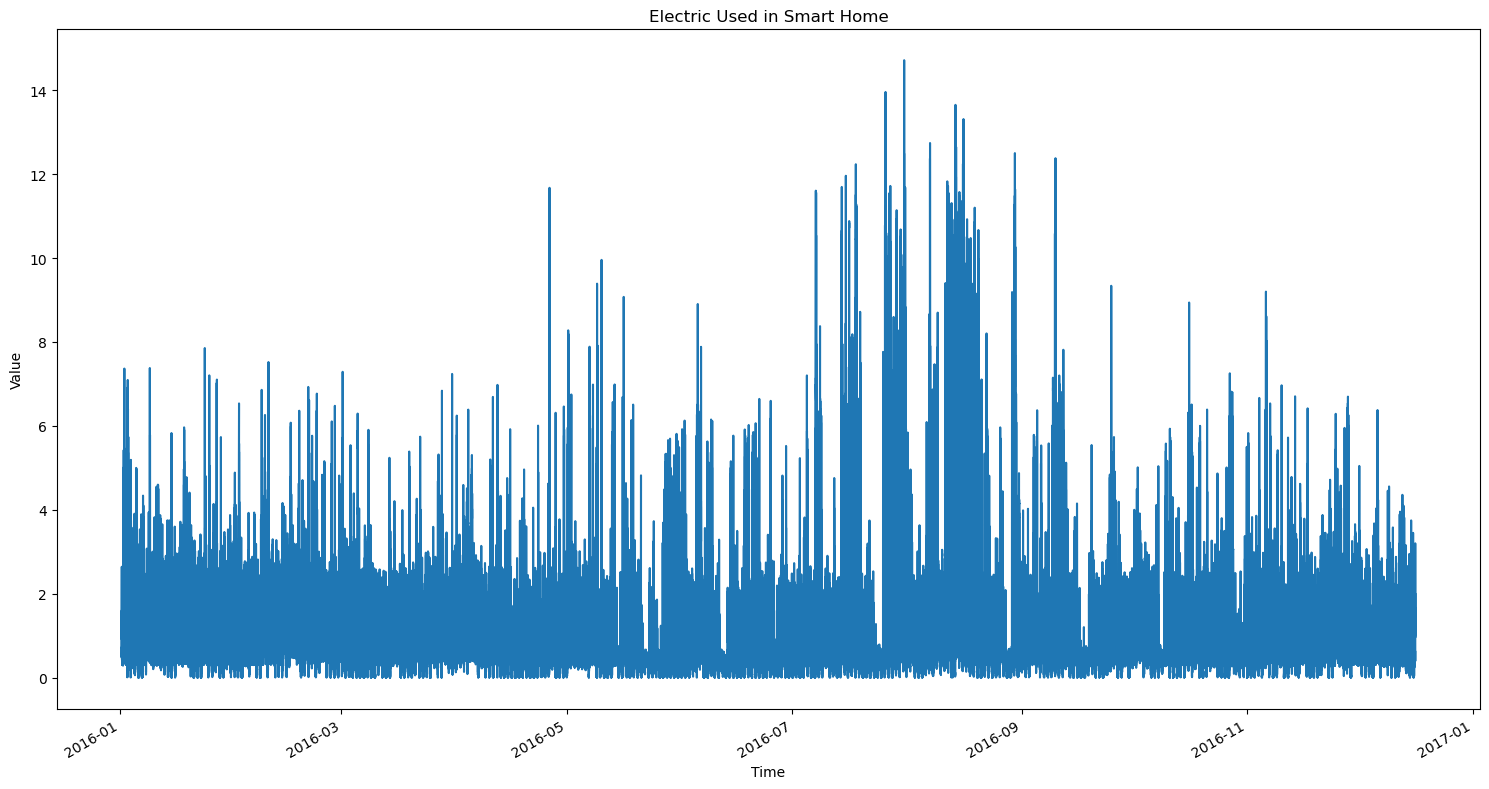

In [21]:
fig, ax = pt.subplots(figsize=(15,8))

ax.plot(data['use [kW]'], label='Electricy Usage')
ax.set_title('Electric Used in Smart Home')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
fig.autofmt_xdate()
pt.tight_layout()

<Axes: xlabel='hour', ylabel='use [kW]'>

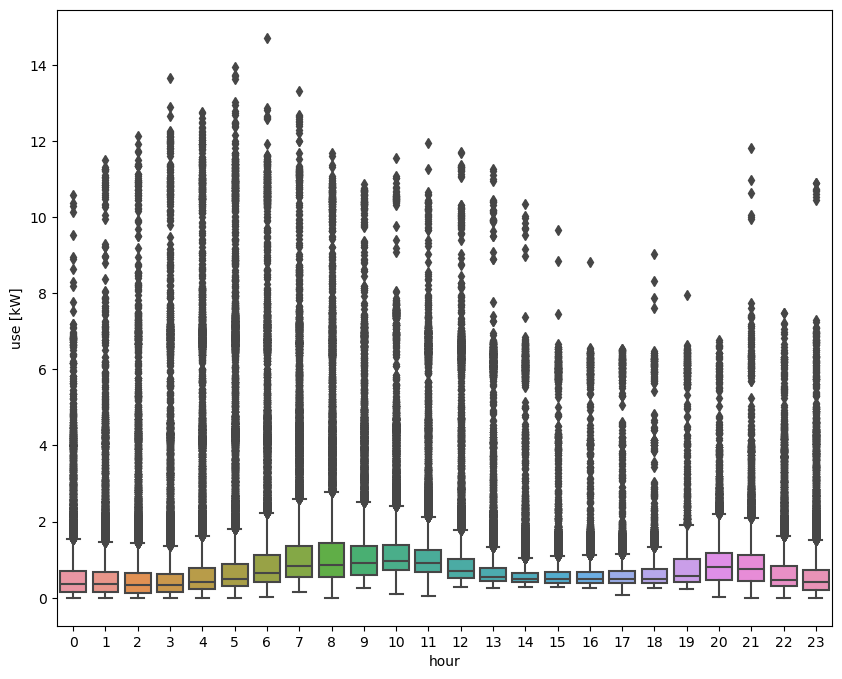

In [22]:
fig, ax = pt.subplots(figsize=(10,8))

sns.boxplot(data=data, x='hour', y='use [kW]')

<Axes: xlabel='month', ylabel='use [kW]'>

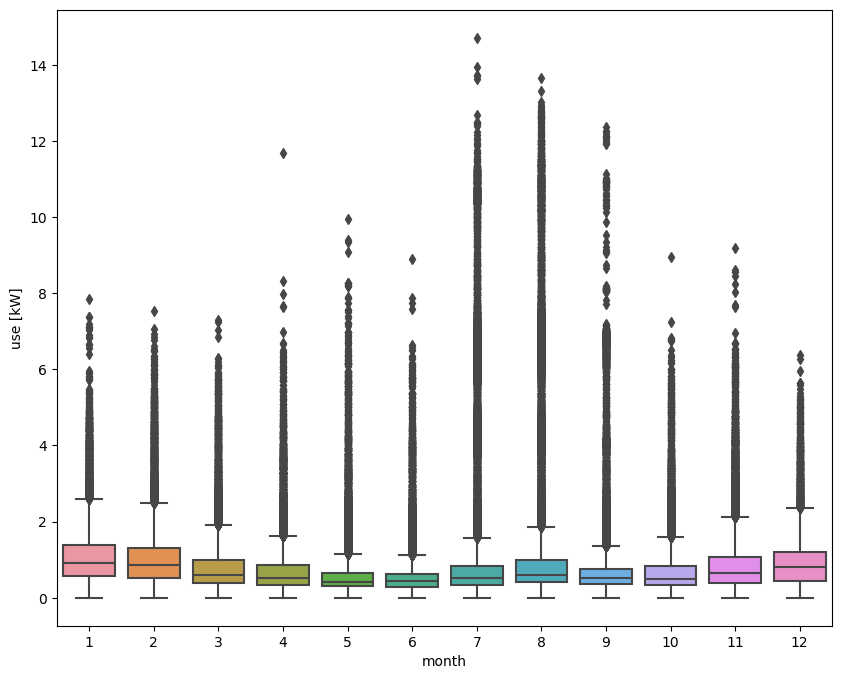

In [23]:
fig, ax = pt.subplots(figsize=(10,8))

sns.boxplot(data=data, x='month', y='use [kW]')

R-Value:  -0.002421367627318954
P-Value:  0.08564255275079755
Std Err:  1.0247810651350512e-08


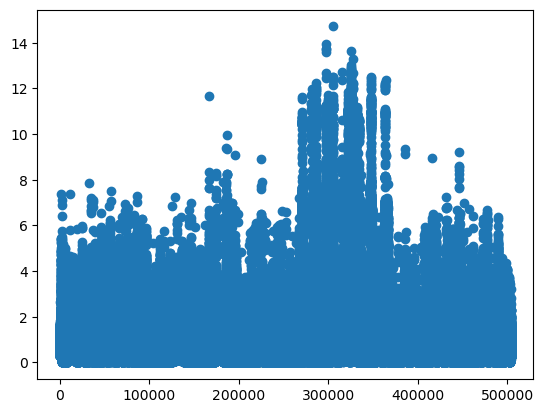

In [24]:
xi = np.arange(0,503910)
y = data['use [kW]']

slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)

print('R-Value: ' , r_value)
print('P-Value: ' , p_value)
print('Std Err: ' , std_err)

line = slope*xi  + intercept
pt.plot(xi, line, 'r', xi, y, 'o')
pt.show()


Looks like it is not linear with time

In [25]:
std_dev = data['use [kW]'].std()
print(f' Standard Deviation: {std_dev}')

mean = np.mean(data['use [kW]'])
print(f' Mean: {mean}')

coef_var = (std_dev / mean)*100
print(f' Coefficient Variance: {coef_var} %')

 Standard Deviation: 1.0582073579479323
 Mean: 0.8589623950050781
 Coefficient Variance: 123.19600533172076 %


In [26]:
#This requires because XGBoost cant run with feature names with [] inside
data.rename(columns=lambda x: x.replace('[', '').replace(']', '').replace('<', ''), inplace=True)

# Check the renamed columns
print(data.columns)

Index(['use kW', 'gen kW', 'House overall kW', 'Dishwasher kW', 'Furnace 1 kW',
       'Furnace 2 kW', 'Home office kW', 'Fridge kW', 'Wine cellar kW',
       'Garage door kW', 'Kitchen 12 kW', 'Kitchen 14 kW', 'Kitchen 38 kW',
       'Barn kW', 'Well kW', 'Microwave kW', 'Living room kW', 'Solar kW',
       'temperature', 'icon', 'humidity', 'visibility', 'summary',
       'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability',
       'year', 'month', 'day', 'weekday', 'weekofyear', 'hour', 'minute',
       'Timing'],
      dtype='object')


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503910 entries, 2016-01-01 14:00:00 to 2016-12-16 12:29:00
Data columns (total 39 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   use kW               503910 non-null  float64
 1   gen kW               503910 non-null  float64
 2   House overall kW     503910 non-null  float64
 3   Dishwasher kW        503910 non-null  float64
 4   Furnace 1 kW         503910 non-null  float64
 5   Furnace 2 kW         503910 non-null  float64
 6   Home office kW       503910 non-null  float64
 7   Fridge kW            503910 non-null  float64
 8   Wine cellar kW       503910 non-null  float64
 9   Garage door kW       503910 non-null  float64
 10  Kitchen 12 kW        503910 non-null  float64
 11  Kitchen 14 kW        503910 non-null  float64
 12  Kitchen 38 kW        503910 non-null  float64
 13  Barn kW              503910 non-null  float64
 14  Well kW              503910 non-nu

# Stationary Check

In [31]:
adf_results = adfuller(data['use kW'])
print(f' ADF Statistic: {adf_results[0]}')
print(f' P-Value: {adf_results[1]}')

KeyboardInterrupt: 

It appears that the 'useKW' is already stationary 

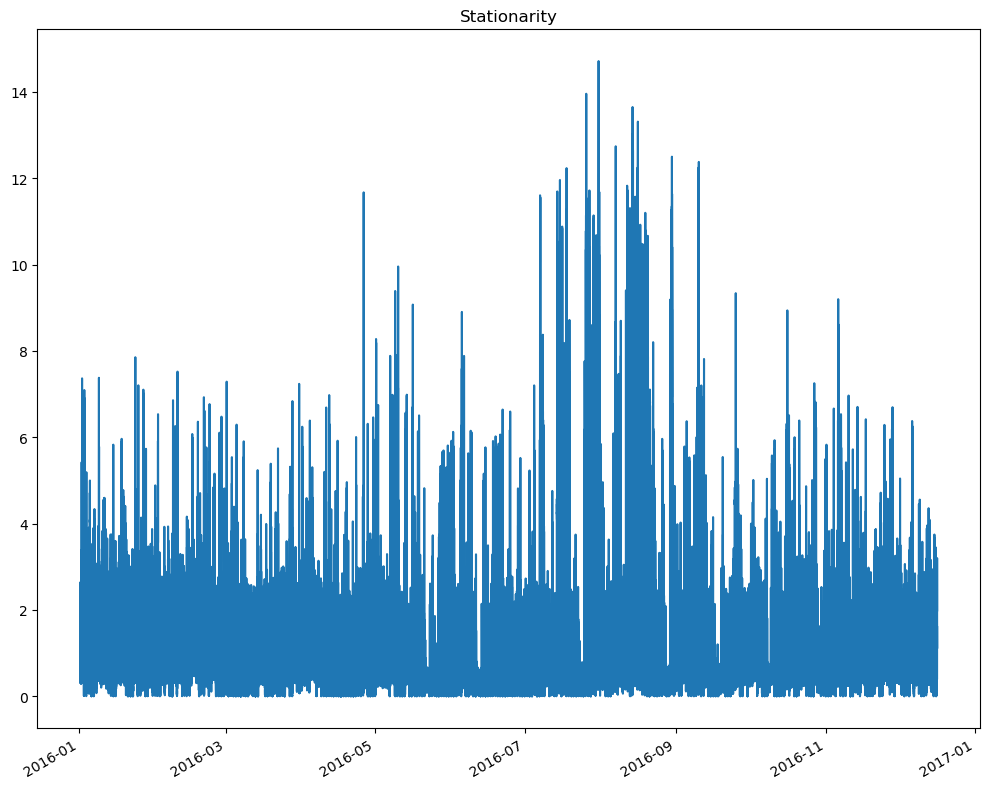

In [39]:
fig, ax = pt.subplots(figsize=(10,8))

ax.plot(data['use kW'])
ax.set_title('Stationarity')
fig.autofmt_xdate()
pt.tight_layout()

0 order integration

<function plot_acf at 0x0000028D0C959F80>


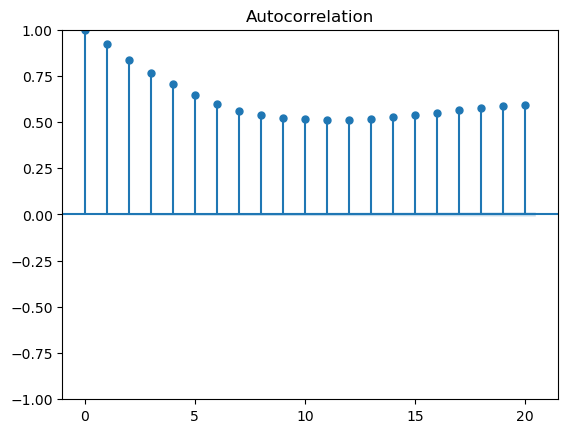

In [40]:
plot_acf(data['use kW'], lags=20)
print(plot_acf)

<function plot_pacf at 0x0000028D0C959E40>


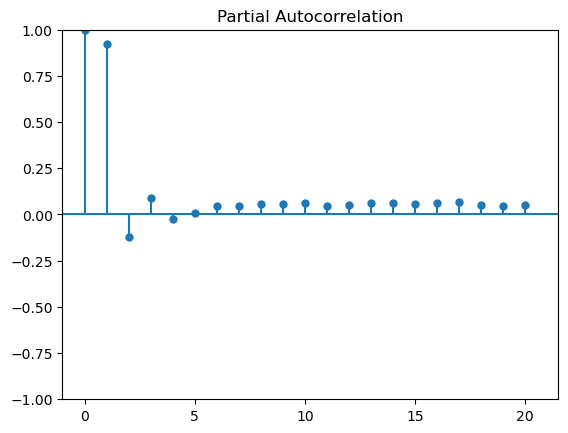

In [41]:
plot_pacf(data['use kW'], lags=20)
print(plot_pacf)

# Model Selection

In [37]:
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX

def optimize_ARIMA(endog: Union[pd.Series, list], order_list: list, d: int) -> pd.DataFrame:
    results = []  # Initialize an empty list to store results
    for order in tqdm_notebook(order_list):  # Iterate over each unique (p,q) combination. Tqdm_notebook will display a progress bar.
        try:
            # Fit an ARIMA(p,d,q) model using the SARIMAX function.
            model = SARIMAX(endog, order=(order[0], d, order[1]), simple_differencing=False).fit(disp=False)
            aic = model.aic  # Calculate the model AIC
            results.append([order, aic])
        except Exception as e:
            print(f"Error fitting SARIMAX with order {order}: {e}")
            continue

    if not results:
        print("No models were successfully fitted.")
        return pd.DataFrame()  # Return an empty DataFrame if no models were fitted

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC']

    # Sorting the results in ascending order. The lower the AIC, the better.
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df

In [38]:
from itertools import product

ps = range(0,4,1)
qs = range(0,4,1)
d = 0

arima_list = list(product(ps,qs))

In [39]:
train = data['use kW'][:-120]
test = data['use kW'][-120:]

In [40]:
train.shape

(503790,)

In [41]:
test.shape

(120,)

In [42]:
results = optimize_ARIMA(train, arima_list, d)
results

C:\Users\Drew\AppData\Local\Temp\ipykernel_42996\1285813300.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):  # Iterate over each unique (p,q) combination. Tqdm_notebook will display a progress bar.


  0%|          | 0/16 [00:00<?, ?it/s]

C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  war

,"(p,q)",AIC
0,"(3, 2)",4.876408e+05
1,"(2, 2)",4.878527e+05
2,"(3, 3)",4.882090e+05
3,"(1, 3)",5.113904e+05
4,"(2, 3)",5.114161e+05
5,"(3, 1)",5.116821e+05
6,"(1, 2)",5.117119e+05
7,"(3, 0)",5.117632e+05
8,"(2, 1)",5.132788e+05
9,"(1, 1)",5.161255e+05


The best model here is ARIMA(3,0,2).

In the context of negative number, a value closer to zero is consider larger. Thus, moving from a more negative number to a less negative number is considered ascending. Hence, the larger the negative value away from 0, the smaller the AIC.

# Residual Analysis

C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)


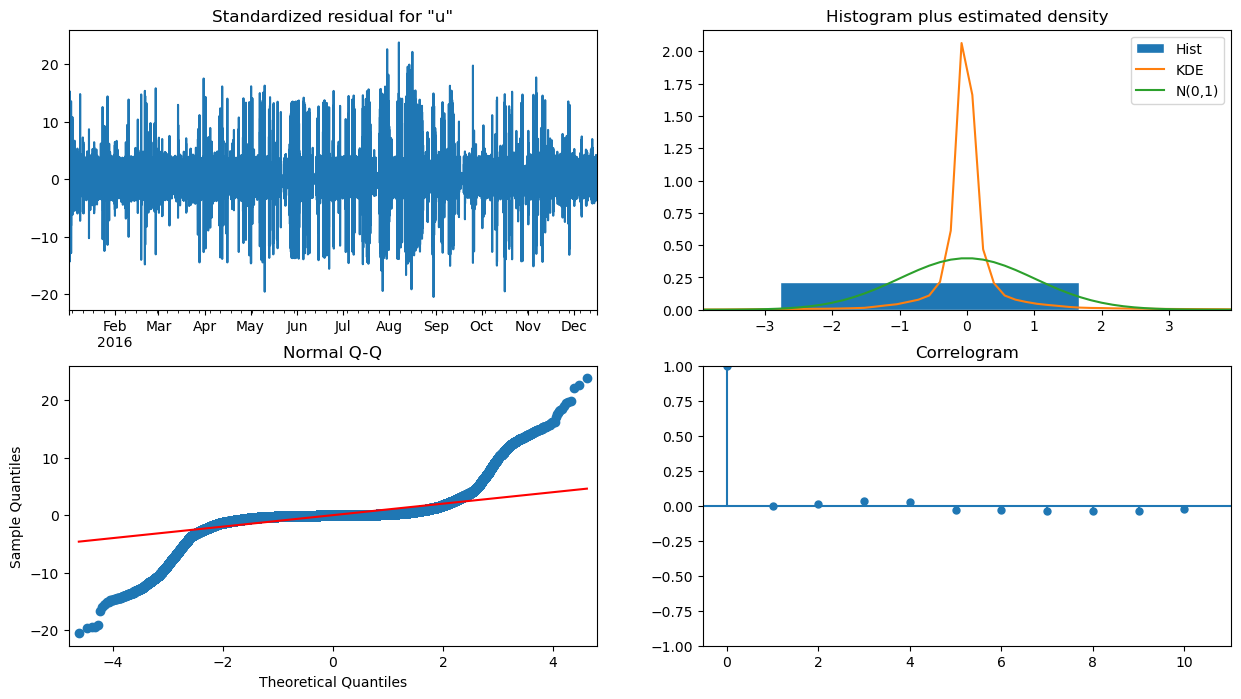

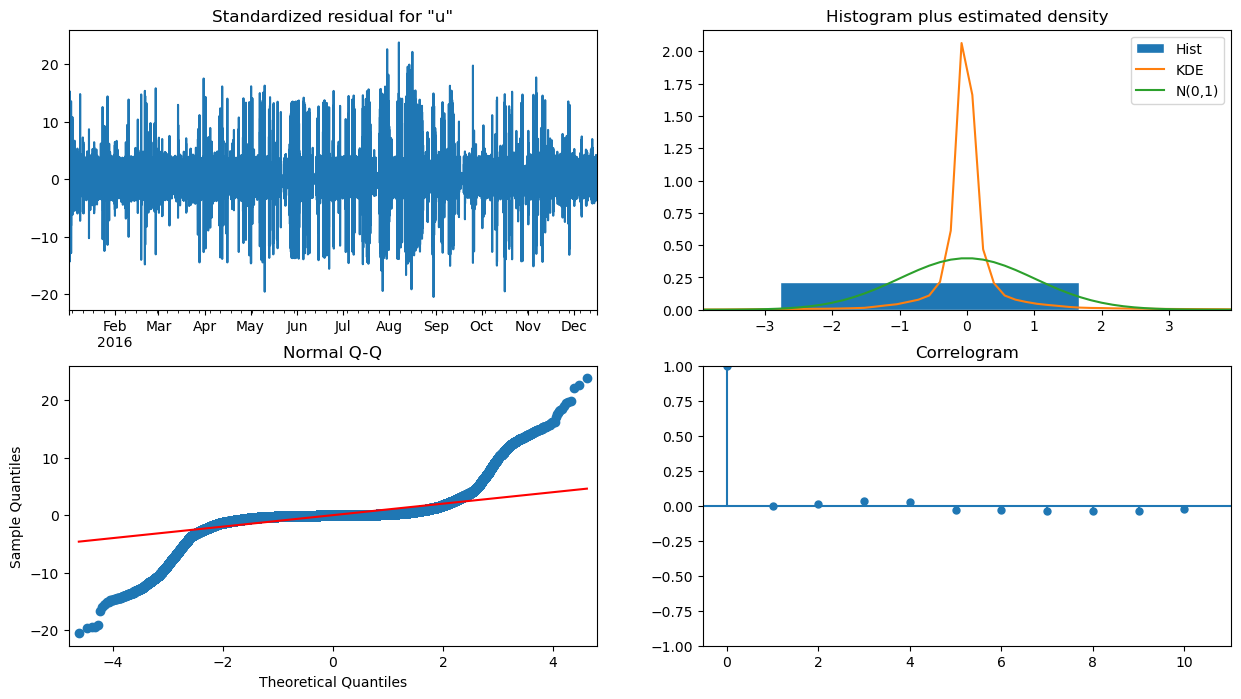

In [43]:
arima_model = SARIMAX(train, order=(3,0,2), simple_differencing=False)
arima_model = arima_model.fit(disp=False)
arima_model.plot_diagnostics(figsize=(15,8))

In [42]:
residuals = arima_model.resid
pvalue = acorr_ljungbox(residuals, np.arange(1,20,1))
print(pvalue)

        lb_stat      lb_pvalue
1      1.580784   2.086477e-01
2     41.505987   9.707098e-10
3    145.473820   2.494876e-31
4    249.254534   9.422140e-53
5    325.203238   3.802466e-68
6    451.267562   2.618917e-94
7    598.811361  4.390039e-125
8    713.427090  9.199004e-149
9    820.786900  7.122904e-171
10   847.029074  1.589817e-175
11   868.687598  3.332666e-179
12   900.786164  3.893897e-185
13   923.511660  4.594437e-189
14   923.594245  3.794023e-188
15   923.721871  2.949011e-187
16   927.743800  3.250413e-187
17   952.040690  1.617597e-191
18  1012.128283  1.795421e-203
19  1060.166356  7.500996e-213


The ARIMA Model (3,0,2) seems fairly good, the residuals are correlated to white noise.

# Forecasting

In [44]:
def rolling_forecast(data: pd.Series, train_len: int, horizon: int, window: int, method: str) -> list:
    total_len = train_len + horizon
    predictions = []

    for i in range(train_len, total_len, window):
        train_data = data[:i]
        
        if method == 'mean':
            mean_val = np.mean(train_data.values)
            predictions.extend([mean_val] * window)
        
        elif method == 'ARIMA':
            model = SARIMAX(train_data, order=(3, 0, 2))
            res = model.fit(disp=False)
            forecast = res.get_forecast(steps=window)
            pred_mean = forecast.predicted_mean
            predictions.extend(pred_mean)
        
        if len(predictions) >= horizon:
            break

    return predictions[:horizon]

# Predicting the Next 2 Hours of Smart Home Electricity Usage

In [45]:
TRAIN = len(train)
HORIZON = len(test)
WINDOW = 3

pred_arima = rolling_forecast(data['use kW'], TRAIN, HORIZON, WINDOW, 'ARIMA')

C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init

C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: M

In [46]:
predicted_data = pd.DataFrame({'Actual Data': data['use kW'][-120:]})
predicted_data.head()

,Actual Data
time,
2016-12-16 10:30:00,1.060917
2016-12-16 10:31:00,1.002983
2016-12-16 10:32:00,1.059683
2016-12-16 10:33:00,1.140067
2016-12-16 10:34:00,1.655150


In [47]:
predicted_data['Predicted Data'] = pred_arima
predicted_data.head()

,Actual Data,Predicted Data
time,,
2016-12-16 10:30:00,1.060917,1.546497
2016-12-16 10:31:00,1.002983,1.479630
2016-12-16 10:32:00,1.059683,1.429856
2016-12-16 10:33:00,1.140067,1.083554
2016-12-16 10:34:00,1.655150,1.103846


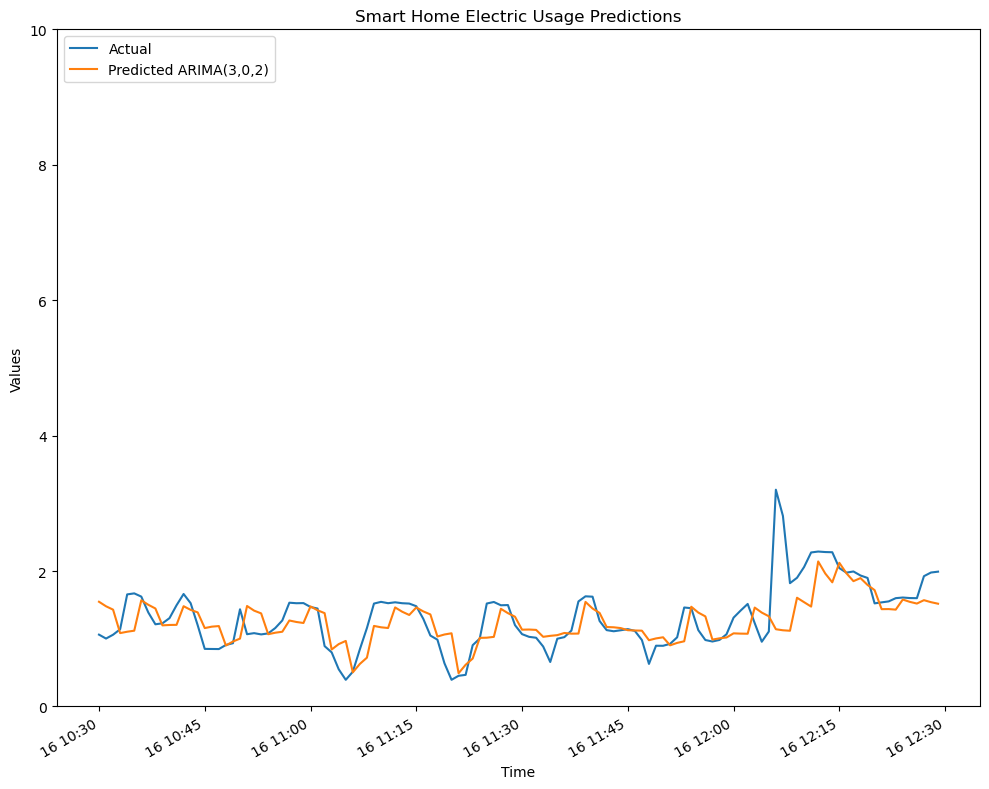

In [48]:
fig, ax = pt.subplots(figsize=(10,8))

ax.plot(predicted_data['Actual Data'], label='Actual')
ax.plot(predicted_data['Predicted Data'], label='Predicted ARIMA(3,0,2)')
ax.set_title('Smart Home Electric Usage Predictions')
ax.set_xlabel('Time')
ax.set_ylabel('Values')
ax.set_ylim(0,10)
ax.legend(loc=2)
fig.autofmt_xdate()
pt.tight_layout()

In [49]:
mse = mean_squared_error(predicted_data['Actual Data'], predicted_data['Predicted Data'])
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.1392993933204707


In [50]:
mae = mean_absolute_error(predicted_data['Actual Data'], predicted_data['Predicted Data'])
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.24656623576137193


In [51]:
var = predicted_data['Predicted Data'].std()**2
print(f' Variance: {var}')

 Variance: 0.09230334157268949


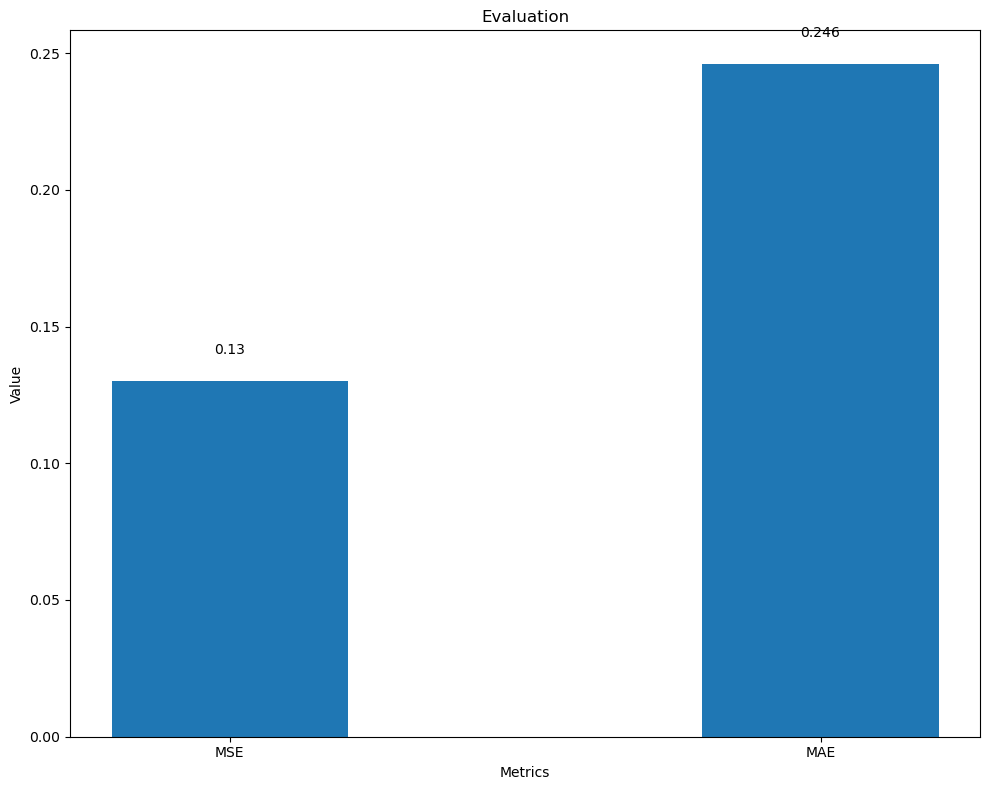

In [52]:
fig, ax = pt.subplots(figsize=(10,8))

X = ['MSE', 'MAE']
y = [0.13, 0.246]

ax.bar(X,y, width=0.4)
ax.set_title('Evaluation')
ax.set_xlabel('Metrics')
ax.set_ylabel('Value')

for index, value in enumerate(y):
    pt.text(x=index, y=value + 0.01, s=str(value), ha='center')

pt.tight_layout()

Without PCA-ing important features together, it seeems that the model is able to capture some patterns of the data instead of just laying a flat line. However, the model performance is still very poor according to the MSE whereas it is higher than the variance